In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv("dados_produtos.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [6]:
df.describe 

<bound method NDFrame.describe of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

Text(0.5, 0, 'Classes')

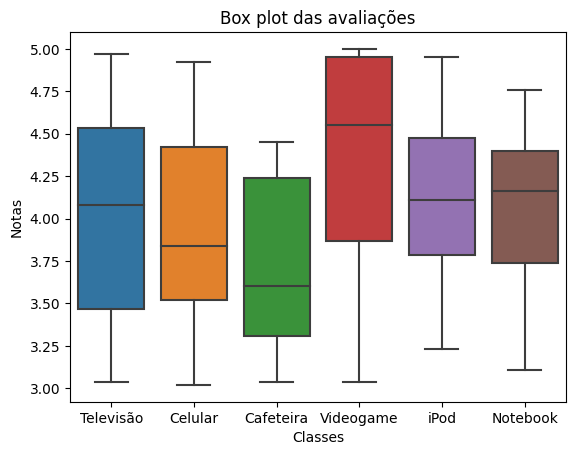

In [7]:

sns.boxplot(x = df['product_name'], y = df['rating'])
plt.title('Box plot das avaliações')
plt.ylabel('Notas')
plt.xlabel('Classes')

In [15]:
x = df['rating_count']
y = df['purchased']
print(x,y)

0       29
1     3872
2     1187
3     4097
4     4738
      ... 
95    1372
96    1690
97    3364
98    1825
99     533
Name: rating_count, Length: 100, dtype: int64 0     1
1     0
2     0
3     1
4     1
     ..
95    0
96    1
97    1
98    1
99    0
Name: purchased, Length: 100, dtype: int64


In [16]:
y = ['Não comprou' if valor == 0 else 'Comprou' for valor in y]
print(y)

['Comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Comprou', 'Não comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Comprou', 'Não comprou', 'Comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Comprou', 'Comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Não comprou', 'Não comprou', 'Comprou', 'Comprou', 'Comprou

In [17]:
#Dados treinamento
notas = np.array(x)
decisao = np.array(y)

In [19]:
print(notas,decisao)

[  29 3872 1187 4097 4738 1413 1907 3857 2800 2600 2748 4599   79 1428
 4399 4977 3745 4801 1425 4620 1744 1879  230 4841 3679 3649 2773 4965
 4780 3070 2544 1946 1992 4236 4613  245  556 4403 3376 1786 2357 3299
 3162 2385 2895 4566  950 2463 2986 1489 1936 4969 3537 3065  394 1556
 4333   10 4301 1779 1435  229 1075 1577 1408  380 4339  407 1989 3244
 3651 3901 2319 4133   16 3113 1887 4418 4323 2463  583 2910 4457  798
 1358 2308  258 1913 2190 3698 1707 2754 1558 1311 1713 1372 1690 3364
 1825  533] ['Comprou' 'Não comprou' 'Não comprou' 'Comprou' 'Comprou' 'Não comprou'
 'Não comprou' 'Não comprou' 'Comprou' 'Não comprou' 'Não comprou'
 'Comprou' 'Comprou' 'Não comprou' 'Comprou' 'Comprou' 'Comprou' 'Comprou'
 'Comprou' 'Não comprou' 'Não comprou' 'Não comprou' 'Comprou' 'Comprou'
 'Comprou' 'Comprou' 'Comprou' 'Não comprou' 'Comprou' 'Não comprou'
 'Comprou' 'Não comprou' 'Comprou' 'Comprou' 'Não comprou' 'Não comprou'
 'Não comprou' 'Não comprou' 'Comprou' 'Comprou' 'Comprou' 'C

In [21]:
#dividir dados em teste e treino
notas_treino, notas_teste, decisao_treino, decisao_teste = train_test_split(notas.reshape(-1,1),
                                                                            decisao.reshape(-1,1), test_size=0.2, random_state=42)

In [22]:
modelo = DecisionTreeClassifier()
modelo.fit(notas_treino,decisao_treino)

DecisionTreeClassifier()

In [23]:
previsoes = modelo.predict(notas_teste)

In [24]:
print(previsoes)

['Comprou' 'Não comprou' 'Comprou' 'Comprou' 'Comprou' 'Comprou' 'Comprou'
 'Não comprou' 'Comprou' 'Não comprou' 'Não comprou' 'Não comprou'
 'Comprou' 'Não comprou' 'Comprou' 'Comprou' 'Não comprou' 'Não comprou'
 'Não comprou' 'Não comprou']


In [25]:
acuracy = accuracy_score(decisao_teste,previsoes)
print(acuracy)

0.45


[Text(0.4879032258064516, 0.96875, '29 <= 1962.5\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = Comprou'),
 Text(0.2903225806451613, 0.90625, '29 <= 1852.0\ngini = 0.422\nsamples = 33\nvalue = [10, 23]\nclass = Não comprou'),
 Text(0.25806451612903225, 0.84375, '29 <= 1633.5\ngini = 0.452\nsamples = 29\nvalue = [10, 19]\nclass = Não comprou'),
 Text(0.1935483870967742, 0.78125, '29 <= 1522.5\ngini = 0.375\nsamples = 24\nvalue = [6, 18]\nclass = Não comprou'),
 Text(0.16129032258064516, 0.71875, '29 <= 1462.0\ngini = 0.408\nsamples = 21\nvalue = [6, 15]\nclass = Não comprou'),
 Text(0.12903225806451613, 0.65625, '29 <= 1410.5\ngini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = Não comprou'),
 Text(0.0967741935483871, 0.59375, '29 <= 1390.0\ngini = 0.415\nsamples = 17\nvalue = [5, 12]\nclass = Não comprou'),
 Text(0.06451612903225806, 0.53125, '29 <= 122.5\ngini = 0.375\nsamples = 16\nvalue = [4, 12]\nclass = Não comprou'),
 Text(0.03225806451612903, 0.46875, 'gini = 0.0\nsamples

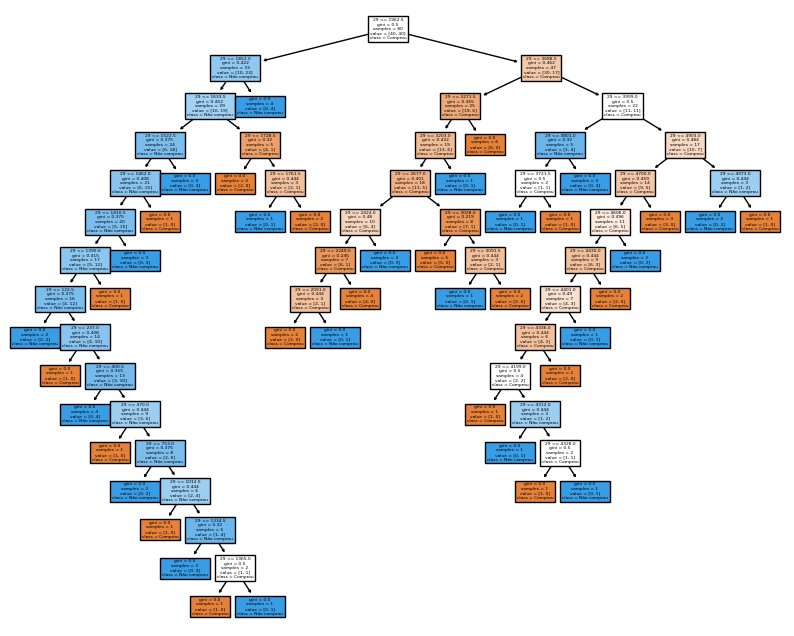

In [26]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(modelo,feature_names= notas.tolist(), class_names = decisao.tolist(), filled= True)


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 2]
 [0 2]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 0]
 [1 0]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Co

C:\Users\dsadm\AppData\Local\Temp\ipykernel_22444\188715091.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_22444\188715091.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classifi

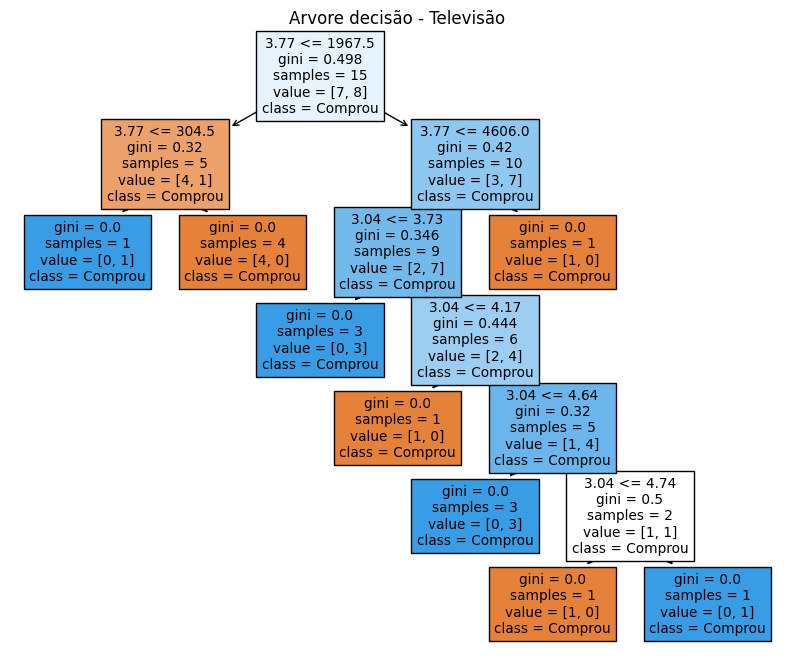

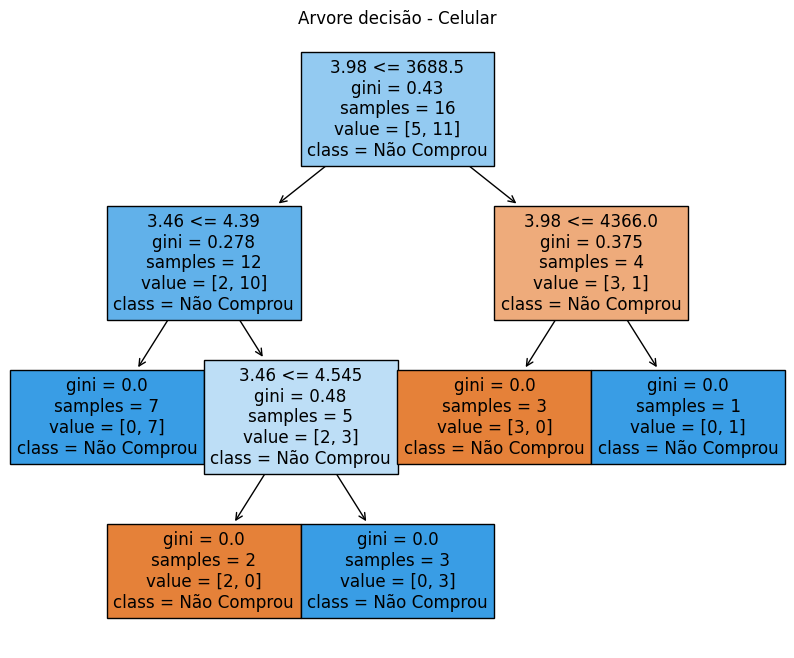

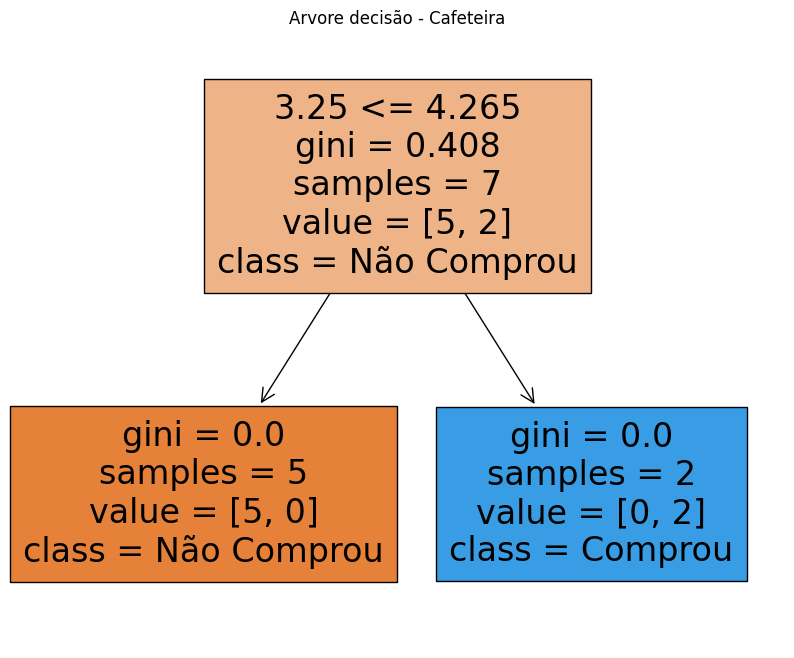

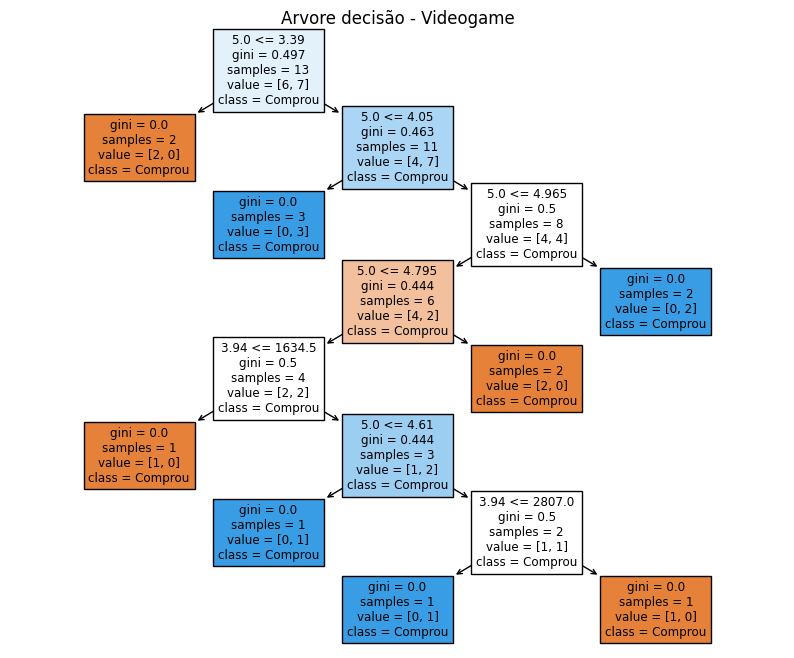

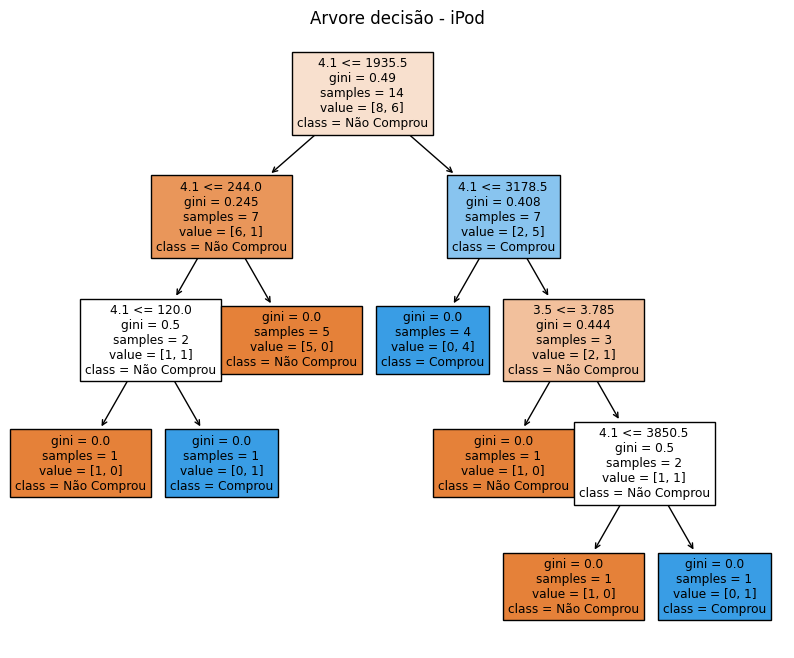

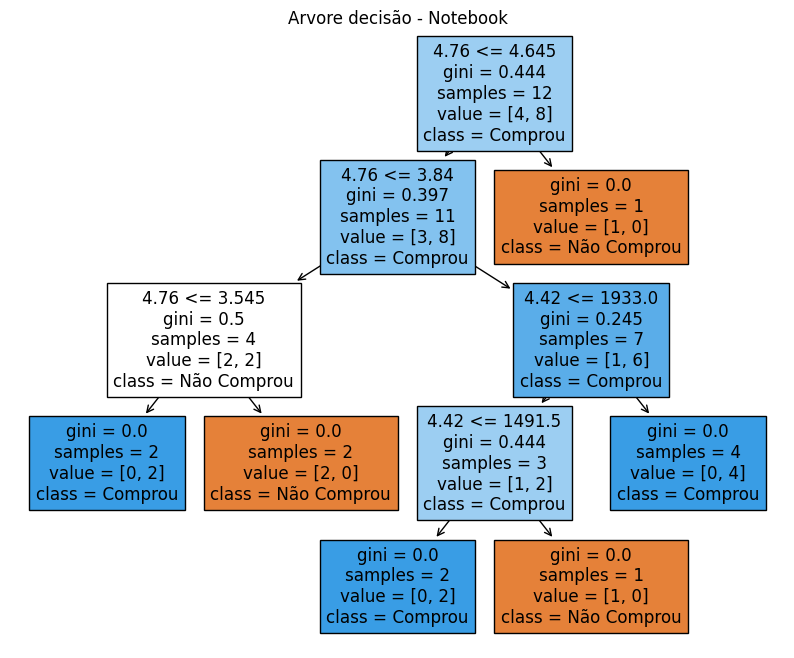

In [31]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')